Code: Alexis Aubel (alexis.aubel@gmail.com)

In [23]:
sim_name = [
    'MeanWind_Exp003_I2p0_30day_Hourly',                      #Hourly, 3D, with MFx
]

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import Utils as utils

In [25]:
sim_nb = len(sim_name)
dataset_1D, dataset_2D = utils.import_from_name(sim_name)

In [33]:
############################################ COORDINATES ############################################
t = []
x = []
y = []
GRID_SIZE = []
for case in range(sim_nb):
    t.append(dataset_2D[case].coords['time'].values)
    x.append(dataset_2D[case].coords['x'].values)
    y.append(dataset_2D[case].coords['y'].values)
    GRID_SIZE.append(x[case][-1])

In [27]:
############################################# VARIABLES #############################################
PW = []
U_surf = []
V_surf = []
for case in range(sim_nb):
    PW.append(np.array(dataset_2D[case]['PW']))
    U_surf.append(dataset_2D[case]['USFC'])
    V_surf.append(dataset_2D[case]['VSFC'])

In [28]:
#Computing the PW Barycentre
cloud_center = []
for case in range(sim_nb):
    cloud_center.append(np.array(utils.compute_barycenter_list(PW[case], GRID_SIZE[case], tolerance=0.7)))

In [29]:
#Moving referential
centered_PW = [[] for _ in range(sim_nb)]
centered_U = [[] for _ in range(sim_nb)]
centered_V = [[] for _ in range(sim_nb)]

for case in range(sim_nb):
    for i in range(len(t[case])):
        try:
            centered_PW[case].append(np.copy(utils.recenter_matrix(np.copy(PW[case][i]), [cloud_center[case][i][j]*256/GRID_SIZE[case]%256 for j in range(2)])))
            centered_U[case].append(np.copy(utils.recenter_matrix(np.copy(U_surf[case][i]), [cloud_center[case][i][j]*256/GRID_SIZE[case]%256 for j in range(2)])))
            centered_V[case].append(np.copy(utils.recenter_matrix(np.copy(V_surf[case][i]), [cloud_center[case][i][j]*256/GRID_SIZE[case]%256 for j in range(2)])))

        except IndexError:
            break
    

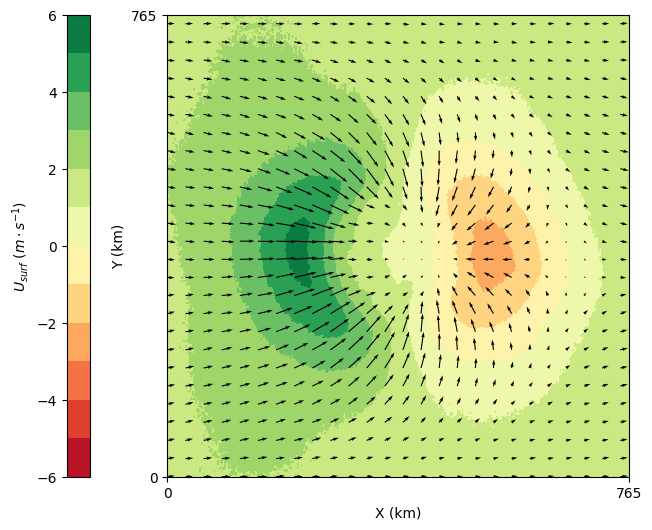

In [30]:
case=0
figure, axis = plt.subplots(1,1)
    
figure.set_figwidth(10)
figure.set_figheight(6)

X=x[case]/1000
Y=y[case]/1000
axis.set_aspect('equal')
axis.set_xlabel('X (km)')
axis.set_ylabel('Y (km)')
axis.set_xticks([0,765])
axis.set_yticks([0,765])
        
im = axis.contourf(X,Y,np.mean(centered_U[case], axis=0), cmap='RdYlGn',origin='lower',levels=range(-6,7))
axis.quiver(X[::10],Y[::10],np.mean(centered_U[case], axis=0)[::10,::10],np.mean(centered_V[case], axis=0)[::10,::10], scale_units='width')
figure.colorbar(im, ax=axis, label='$U_{surf}$ ($m\cdot s^{-1}$)', extend='both', location='left')
figure.show()

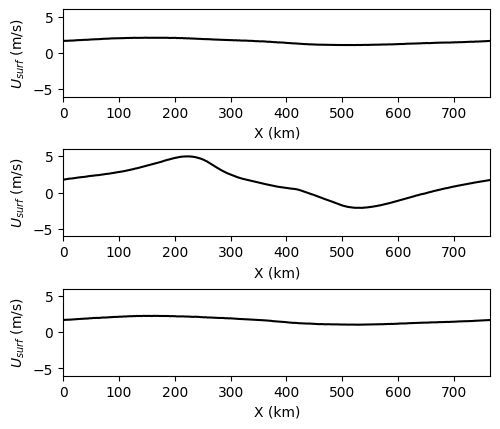

In [31]:
case=0
X=x[case]/1000

figure, axis = plt.subplots(3,1)

figure.set_figwidth(5)
figure.set_figheight(4.5)
figure.tight_layout()
figure.subplots_adjust(top=0.9,wspace=0.4,hspace=0.6)

prof_U = np.mean(np.mean(centered_U[case], axis=0)[206:], axis=0)
axis[0].plot(X,prof_U,color='k')

prof_U = np.mean(np.mean(centered_U[case], axis=0)[98:158], axis=0)
axis[1].plot(X,prof_U,color='k')

prof_U = np.mean(np.mean(centered_U[case], axis=0)[:50], axis=0)
axis[2].plot(X,prof_U,color='k')

for ax in axis:
    ax.set_ylim(-6,6)
    ax.set_xlim(xmin=0, xmax=765)
    ax.set_xlabel('X (km)')
    ax.set_ylabel('$U_{surf}$ (m/s)')
figure.show()